In [1]:
%pylab inline
import matplotlib.pyplot as plt
#pylab.rcParams['figure.figsize'] = (8.0, 15.0)
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


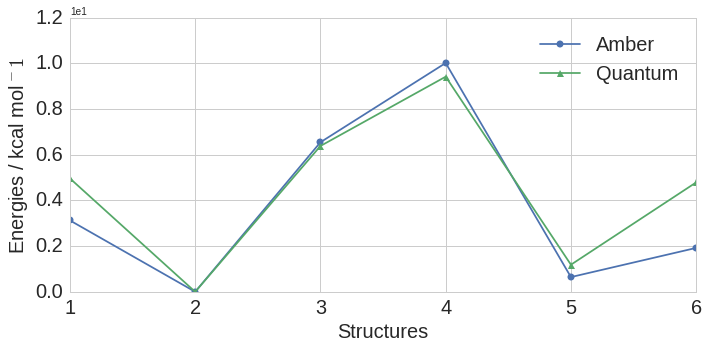

In [6]:
#open the amber vs quantum energies, use cols 0 (numb of structures) 1 (Amber) and 2(Gaussian) to have the energies values
amber = loadtxt("amber_energies.dat",usecols=[0])
quantum = loadtxt("quantum_energy.dat",usecols=[0])
#convert qunatum to kcal/mol
quantum_kcal = []
for val in quantum:
    kcal = val*627.59
    quantum_kcal.append(kcal)
    
#now relative to the minima
min_amber = min(amber)
min_quantum = min(quantum_kcal)
amber_rel = []
quantum_rel = []
for amb in amber:
    new_val = amb - min_amber
    amber_rel.append(new_val)
for qua in quantum_kcal:
    new_val = qua - min_quantum
    quantum_rel.append(new_val)

x_axis = linspace(1,len(amber),len(amber))    
fig,ax = plt.subplots(figsize=[10,5])
color = sbn.color_palette()
marker = ['o', '^']
ax.plot(x_axis,amber_rel,color=color[0],marker=marker[0],label="Amber")
ax.plot(x_axis,quantum_rel,color=color[1],marker=marker[1],label="Quantum")
plt.xlabel("Structures",fontsize=20)
plt.ylabel("Energies / kcal mol$^-1$",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0),fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.tight_layout()

